In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('surat_fe.csv')

df.shape

(3255, 12)

# Metadata about the data

In [3]:
df.isna().sum()

location          242
bhk                 0
areaType            0
square_feet         0
transaction        14
status              0
floorNum          203
totalFloor        203
furnishing         24
facing            835
price_per_sqft    271
price             171
dtype: int64

In [4]:
df.duplicated().sum()

21

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(3234, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3234 entries, 0 to 3254
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        2992 non-null   object 
 1   bhk             3234 non-null   float64
 2   areaType        3234 non-null   object 
 3   square_feet     3234 non-null   object 
 4   transaction     3220 non-null   object 
 5   status          3234 non-null   object 
 6   floorNum        3032 non-null   float64
 7   totalFloor      3032 non-null   float64
 8   furnishing      3211 non-null   object 
 9   facing          2407 non-null   object 
 10  price_per_sqft  2965 non-null   float64
 11  price           3063 non-null   float64
dtypes: float64(5), object(7)
memory usage: 328.5+ KB


# Location

# Conclusion :
- Most of the data from the area of vesu, palanpur, pal, althan, adajan, jahangirpura, dumas etc.
- There are 242 null values available.

In [8]:
df['location'].isna().sum()

242

In [9]:
df['location'].value_counts()

location
vesu                                  859
palanpur                              431
pal                                   339
althan                                261
adajan                                211
jahangirpura                          204
dumas road/hazira                     157
dindoli                               126
athwalines                            106
udhna                                  57
amroli                                 53
nanpura/gopipura/chauta/sagrampura     38
katargam                               36
sarthana/varachha                      30
kamrej                                 25
punagam                                23
sachin                                 18
kadodara                               12
bardoli                                 6
Name: count, dtype: int64

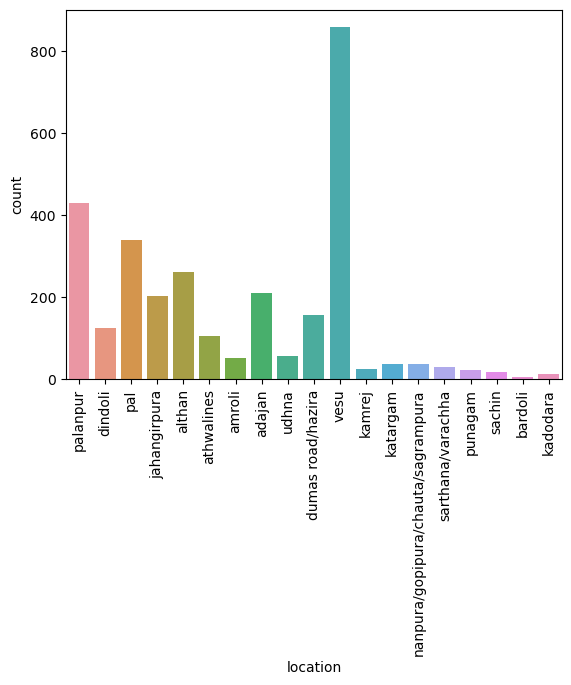

In [10]:
sns.countplot(x = df['location'])
plt.xticks(rotation='vertical')
plt.show()

# BHK

# Conclusion :
- 3 BHK : 1258
- 2 BHK : 1045
- No null values available

In [11]:
df['bhk'].isna().sum()

0

In [12]:
df['bhk'] = df['bhk'].astype("int16")

In [13]:
df['bhk'].value_counts()

bhk
3    1258
2    1045
4     497
1     286
5     117
6      29
8       1
7       1
Name: count, dtype: int64

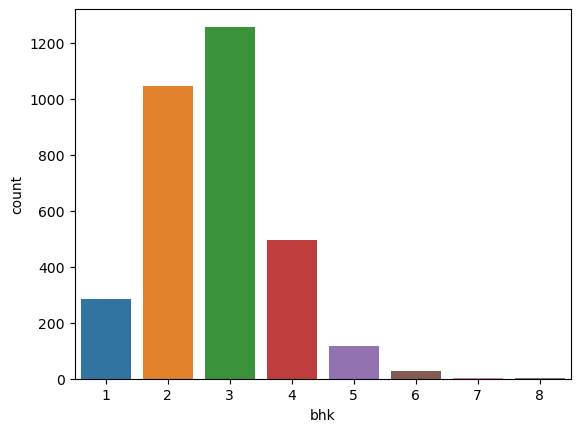

In [14]:
sns.countplot(x=df['bhk'])
plt.show()

# AreaType

# Conclusion :
- Super Area : 61%
- Carpet Area : 39%
- No null values available

In [15]:
df['areaType'].isna().sum()

0

In [16]:
df['areaType'].value_counts()

areaType
Super Area     1963
Carpet Area    1271
Name: count, dtype: int64

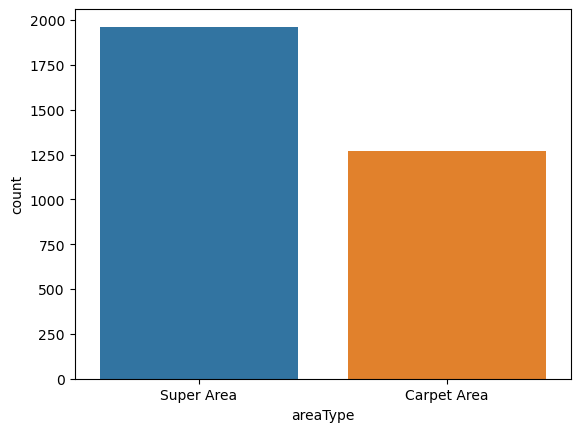

In [17]:
sns.countplot(x=df['areaType'])
plt.show()

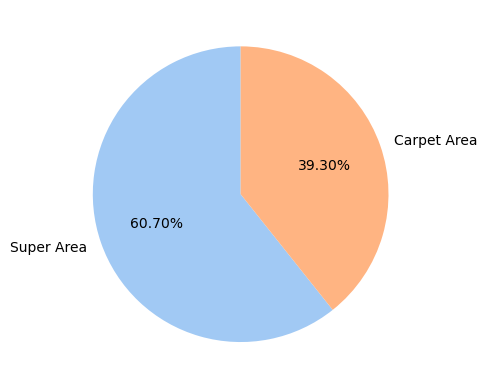

In [18]:
plt.pie(df['areaType'].value_counts(), labels=df['areaType'].value_counts().index, autopct='%.2f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()

# SquareFeet

# Conclusion:
- Right Skewed Data (skewness : 2.37)- 
Based on Boxplot, 205 data is outlier data (check the data and its prices etc)- 

Outliers Data Analyss-  :

Outlier data -> price has right skewed, and this flats prices (mean price) 3.98970- 4 cr.
Outlier flat Location -> Most of the flats in vesu-  (136)
BHK : 4 bhk (88 flats), 5 bhk (87-  flats)
areaType : Super Area -> 1- 91 flats
transaction : Most of the Property are New Prope- rty (176)
status : Most of the under construction (- 143 flats)
furnishing : Most of Unfurnished - (200 flats)
No null values available

In [19]:
df['square_feet'].isna().sum()

0

In [20]:
df['square_feet'].info()

<class 'pandas.core.series.Series'>
Index: 3234 entries, 0 to 3254
Series name: square_feet
Non-Null Count  Dtype 
--------------  ----- 
3234 non-null   object
dtypes: object(1)
memory usage: 50.5+ KB


In [21]:
new_df = df[df['square_feet'] != "395,009"]

new_df = new_df.reset_index().drop(columns=['index'])
new_df.shape

(3233, 12)

In [22]:
new_df[new_df['square_feet'].str.contains(',')]

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
2678,dumas road/hazira,5,Super Area,"11,250",New Property,Under Construction,9.0,14.0,Unfurnished,East,11500.0,12.93
2682,dumas road/hazira,5,Super Area,"11,250",New Property,Under Construction,4.0,18.0,Unfurnished,East,12444.0,14.00
2948,dumas road/hazira,6,Super Area,"10,300",New Property,Under Construction,17.0,18.0,Unfurnished,East,9800.0,10.09


In [23]:
new_df['square_feet'] = new_df['square_feet'].str.replace(",","")

In [24]:
new_df['square_feet'] = new_df['square_feet'].astype('int32')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


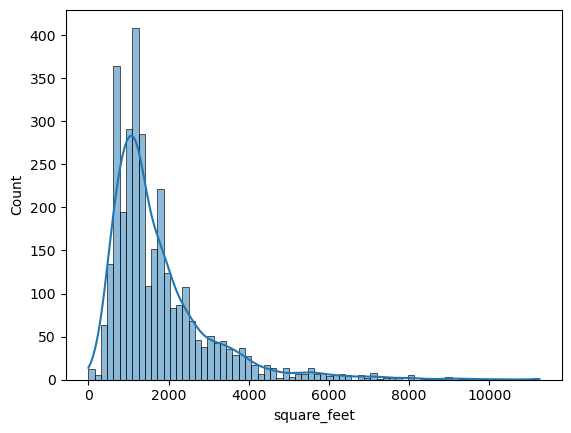

In [25]:
sns.histplot(new_df['square_feet'],kde=True)
plt.show()

In [26]:
new_df['square_feet'].describe()

count     3233.000000
mean      1757.958862
std       1298.221404
min          1.000000
25%        950.000000
50%       1311.000000
75%       2121.000000
max      11250.000000
Name: square_feet, dtype: float64

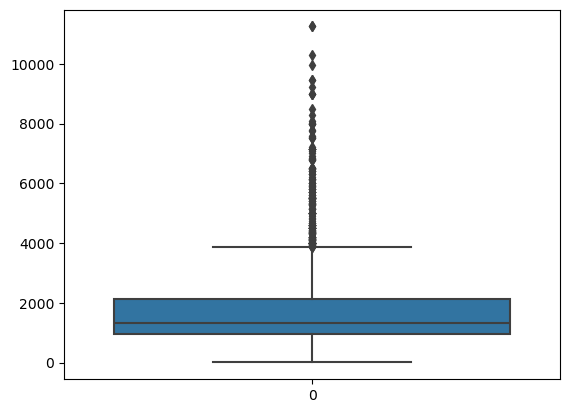

In [27]:
sns.boxplot(new_df['square_feet'])
plt.show()

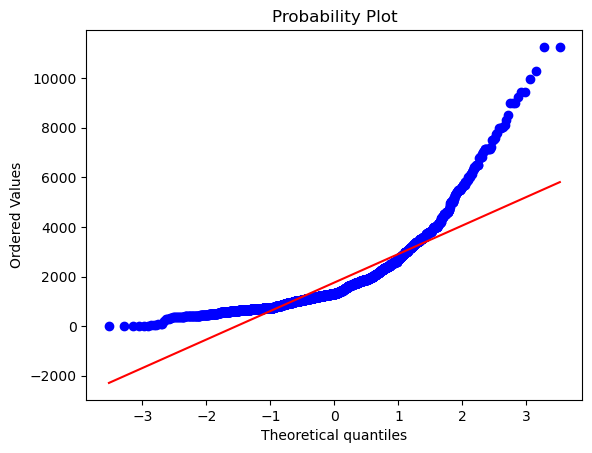

In [28]:
from scipy import stats

stats.probplot(new_df['square_feet'], dist='norm', plot=plt)
plt.show()

In [29]:
new_df['square_feet'].skew()

2.3688221069872486

In [30]:
2121 + 1.5*(2121 - 950)

3877.5

In [31]:
new_df[new_df['square_feet'] > 3877.5].shape
temp = new_df[new_df['square_feet'] > 3877.5]
temp.shape

(205, 12)

In [32]:
temp['location'].value_counts()

location
vesu                 136
dumas road/hazira     28
pal                   15
athwalines            11
althan                 8
adajan                 6
Name: count, dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


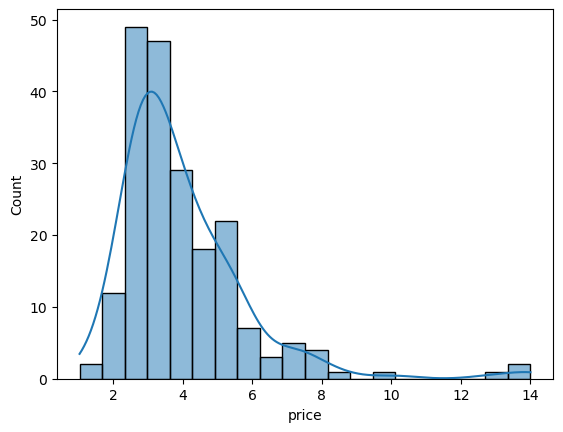

In [33]:
sns.histplot(temp['price'],kde=True)
plt.show()

In [34]:
temp['price'].describe()

count    203.000000
mean       3.989704
std        1.874919
min        1.040000
25%        2.810000
50%        3.500000
75%        4.720000
max       14.000000
Name: price, dtype: float64

In [35]:
temp['bhk'].value_counts()

bhk
4    88
5    87
6    26
3     3
7     1
Name: count, dtype: int64

In [36]:
temp['areaType'].value_counts()

areaType
Super Area     191
Carpet Area     14
Name: count, dtype: int64

In [37]:
temp['transaction'].value_counts()

transaction
New Property    176
Resale           29
Name: count, dtype: int64

In [38]:
temp['status'].value_counts()

status
Under Construction    143
Ready to Move          59
Undefined               3
Name: count, dtype: int64

In [39]:
temp['furnishing'].value_counts()

furnishing
Unfurnished       200
Furnished           3
Semi-Furnished      2
Name: count, dtype: int64

# Transaction

# Conclusion:
- 14 Null values
- 50%-50% for the (New Property, Resale)

In [40]:
new_df['transaction'].isna().sum()

14

In [41]:
new_df['transaction'].value_counts()

transaction
Resale          1629
New Property    1590
Name: count, dtype: int64

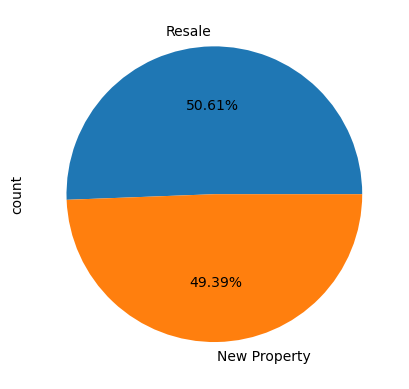

In [42]:
new_df['transaction'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Status

# Conclusion :
- No Null values
- 50%-50% for the (New Property, Resale)
- 66.47% flats ready to move, ~32% flats under construction, 1.64% undefined category

In [43]:
new_df['status'].isna().sum()

0

In [44]:
new_df['status'].value_counts()

status
Ready to Move         2149
Under Construction    1031
Undefined               53
Name: count, dtype: int64

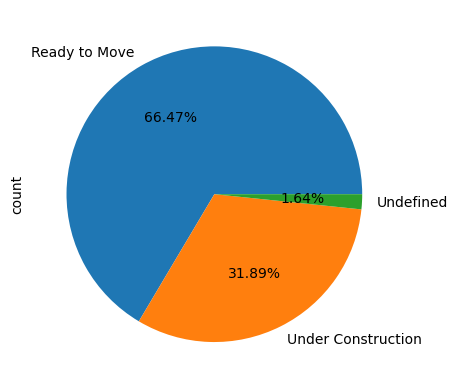

In [45]:
new_df['status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

# FloorNum

# Conclusion :
- 201 Null values
- For the 5th floor, a total of 547 flats are for sale.
- For the 6th, 7th floor , a total of 357, 353 flats are for sale.

In [46]:
new_df['floorNum'].isna().sum()

201

In [47]:
new_df['floorNum'].value_counts()

floorNum
 5.0     547
 6.0     357
 7.0     353
 4.0     287
 3.0     259
 8.0     238
 2.0     228
 1.0     206
 9.0     192
 10.0    121
 11.0     76
 12.0     54
 13.0     34
 0.0      21
 14.0     16
-2.0       9
 16.0      7
 15.0      7
 18.0      6
 17.0      6
-1.0       5
 20.0      2
 19.0      1
Name: count, dtype: int64

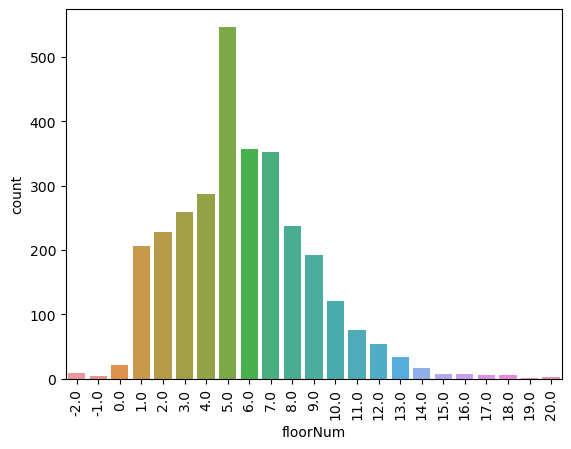

In [48]:
sns.countplot(x=new_df['floorNum'])
plt.xticks(rotation='vertical')
plt.show()

# TotalFloor

# Conclusion :     
- 201 Null values
- For the 5th floor, a total of 547 flats are for sale.
- For the 6th, 7th floor , a total of 357, 353 flats are for sale.
-  One 60 floor value (remove this value)

In [49]:
new_df['totalFloor'].isna().sum()

201

In [50]:
new_df['totalFloor'].value_counts()

totalFloor
13.0    836
12.0    506
14.0    418
5.0     327
4.0     179
10.0    167
11.0    134
8.0      65
7.0      59
15.0     55
3.0      49
6.0      47
19.0     47
9.0      43
20.0     35
18.0     25
1.0      13
2.0       9
16.0      5
21.0      5
17.0      3
25.0      2
59.0      1
30.0      1
60.0      1
Name: count, dtype: int64

In [51]:
new_df[new_df['totalFloor'] == 60]

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
2695,vesu,4,Carpet Area,3367,New Property,Under Construction,1.0,60.0,Unfurnished,East,5999.0,2.01


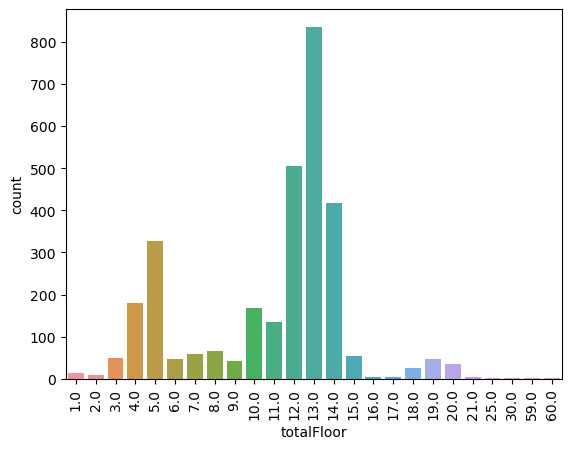

In [52]:
sns.countplot(x=new_df['totalFloor'])
plt.xticks(rotation='vertical')
plt.show()

# Furnishing

# Conclusion :
- 201 Null values
- Most of the flats are Unfurnished flats.

In [53]:
new_df['furnishing'].isna().sum()

22

In [54]:
new_df['furnishing'].value_counts()

furnishing
Unfurnished       2396
Semi-Furnished     414
Furnished          401
Name: count, dtype: int64

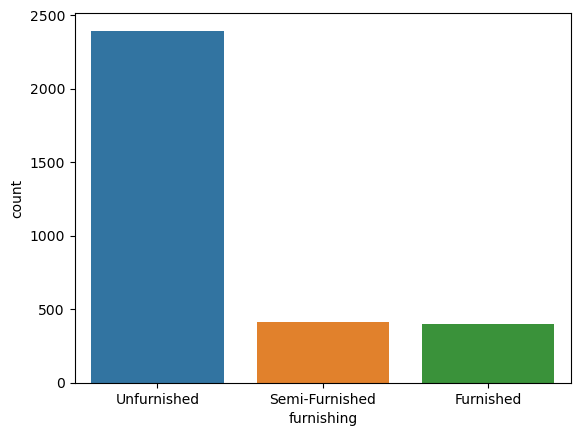

In [55]:
sns.countplot(x=new_df['furnishing'])
plt.show()

# Facing

# Conclusion :
- 826 Null Values
- East side facing of the flats : 1531

In [56]:
new_df['facing'].isna().sum()

826

In [57]:
new_df['facing'].value_counts()

facing
East            1531
South -West      339
North - East     259
North             92
West              81
South - East      50
South             30
North - West      25
Name: count, dtype: int64

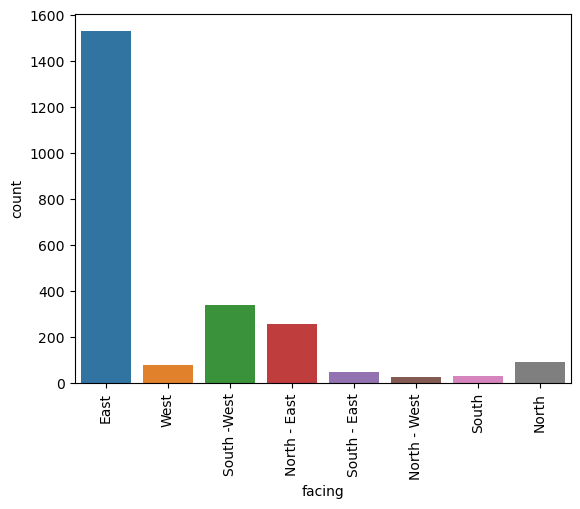

In [58]:
sns.countplot(x=new_df['facing'])
plt.xticks(rotation='vertical')
plt.show()

# Price

# Conclusion :
- 170 Null Values
- Highly Right skewed data(3.557)

In [59]:
new_df['price'].isna().sum()

170

In [60]:
new_df['price'].describe()

count    3063.000000
mean        1.090441
std         1.121328
min         0.050000
25%         0.450000
50%         0.720000
75%         1.320000
max        14.000000
Name: price, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


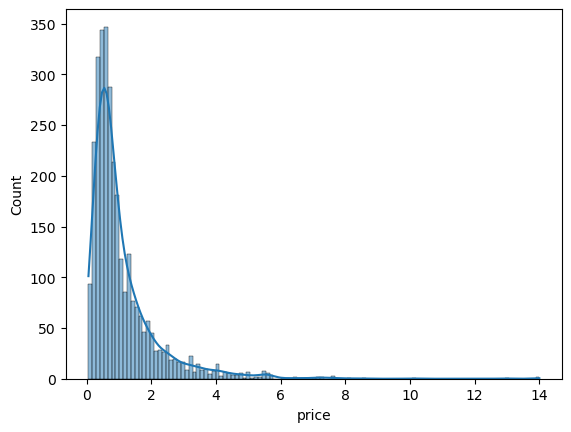

Skew: 3.556789881534308


In [61]:
sns.histplot(new_df['price'],kde=True)
plt.show()
print('Skew:',new_df['price'].skew())

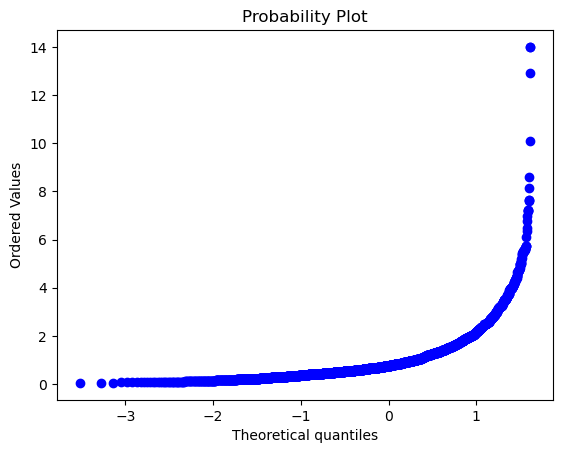

In [62]:
stats.probplot(new_df['price'], dist='norm',plot=plt)
plt.show()

# Price per Sqft

# Conclusion :
- 268 Null Values
- Highly Right skewed data(13.67)

In [63]:
new_df['price_per_sqft'].isna().sum()

268

In [64]:
new_df['price_per_sqft'].describe()

count     2965.000000
mean      4690.562563
std       2295.796489
min        441.000000
25%       3625.000000
50%       4500.000000
75%       5474.000000
max      76389.000000
Name: price_per_sqft, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


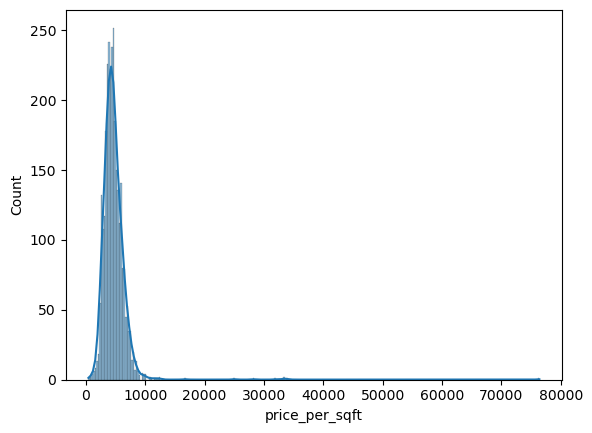

skew: 13.671569453757407


In [65]:
sns.histplot(new_df['price_per_sqft'],kde=True)
plt.show()
print('skew:', new_df['price_per_sqft'].skew())

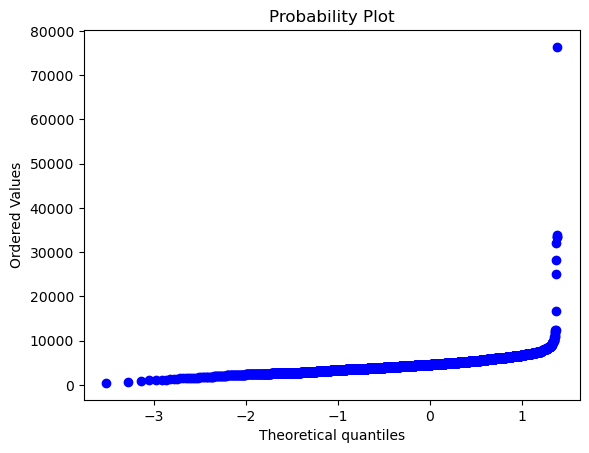

In [66]:
stats.probplot(new_df['price_per_sqft'], dist='norm',plot=plt)
plt.show()

In [67]:
new_df.to_csv('surat_edaUni.csv', index=False)